# Veränderung der Wildtierpopilation










# "Living Planet index"

Gruppe: Wanda Schneid, Riccardo Reich

## Fragestellung :
- "Wie hat sich der Living Planet Index (LPI) in verschiedenen geografischen Regionen im Verlauf der Jahre verändert und welche regionalen Unterschiede sind dabei erkennbar? Was könnten Gründe sein für anfällige statistische Ausreisser?"   
### 1.3 Datenquelle:
- https://ourworldindata.org/2024-living-planet-index



### 1.4 Daten beschaffen und laden

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the data
df = pd.read_csv('global-living-planet-index.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','LPI','LPI_upper','LPI_lower']) 
df



,Gebiet,Code,Jahr,LPI,LPI_upper,LPI_lower
0,Africa,NaN,1970,100.000000,100.000000,100.000000
1,Africa,NaN,1971,94.004613,103.677860,86.478470
2,Africa,NaN,1972,89.996994,105.998410,77.636576
3,Africa,NaN,1973,89.674807,109.674560,74.525344
4,Africa,NaN,1974,85.613140,109.106560,67.872155
...,...,...,...,...,...,...
352,World,OWID_WRL,2016,27.788480,33.389944,22.978655
353,World,OWID_WRL,2017,27.369870,33.070900,22.494209
354,World,OWID_WRL,2018,27.097133,32.976940,22.094297
355,World,OWID_WRL,2019,27.327448,33.411340,22.170989


## 2. Daten vorbereiten 

Spaltenstruktur:

Die Spalte Jahr enthält die Zeitreihen von 1970 bis 2020 (Wide-Format für Jahre).
Die Spalte Gebiet enthält geografische Regionen wie Africa, Asia and Pacific, etc., und dient als Index.

Aktuelles Format:
Wide-Format (auch "Pivot-Format"): Jede Spalte repräsentiert ein Jahr, und die Werte in der Tabelle entsprechen den jeweiligen Messwerten (z. B. LPI-Werten) für die Regionen.
Der Index (Gebiet) ist hier bereits gruppiert.

Für Visualisierungen (z. B. Boxplots):
- Ein Long-Format (tidy data) ist sinnvoller. Hierbei wird jede Kombination aus Jahr und Gebiet in einer separaten Zeile erfasst. Dies ermöglicht eine einfache Gruppierung und die Verwendung von Plot-Bibliotheken wie Seaborn.

- Datentypen im Datensatz:

Gebiet        object

Code          object

Jahr           int64

LPI          float64

LPI_upper    float64

LPI_lower    float64

dtype: object


In [3]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='LPI')
df_pivot


Jahr,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,100.0,94.004613,89.996994,89.674807,85.613140,79.875220,73.681283,68.556696,63.461990,61.046195,...,30.375797,29.082093,28.170413,26.960373,26.047170,25.596067,25.551108,25.256574,24.632017,23.967030
Asia and Pacific,100.0,103.670140,105.456090,106.375460,107.306080,108.420070,107.959830,106.008470,103.881300,102.263150,...,40.703940,40.625206,42.730197,45.025682,47.193745,45.737422,45.325962,43.191930,41.926342,39.603937
Europe and Central Asia,100.0,101.561760,103.288280,105.340410,107.973430,110.224510,111.411240,111.570610,111.541020,111.605480,...,81.817860,76.981880,71.378440,70.045346,68.172190,66.201930,63.673630,62.696710,63.467930,64.715004
Freshwater,100.0,99.466056,98.527170,97.939116,94.870490,90.887773,86.563830,82.577896,78.732413,75.956740,...,16.353667,15.416210,15.310742,15.783352,16.220301,16.004752,15.896590,15.773053,15.531172,14.783052
Latin America and the Caribbean,100.0,101.007160,99.456760,95.006640,89.129627,82.746035,77.167290,71.914930,68.224823,65.981640,...,8.084096,7.323765,6.918912,6.663473,6.525281,5.976160,5.590089,5.621799,5.709860,5.377315
North America,100.0,99.518985,97.919780,95.731320,91.891770,89.910880,89.314854,89.916700,90.695524,91.205144,...,71.836823,70.693160,69.847405,69.223803,69.807530,69.361650,68.662120,66.512720,64.225050,60.955050
World,100.0,99.406844,98.142850,96.616770,94.809854,92.655015,89.991647,86.367744,82.867820,80.259967,...,29.602800,28.667074,28.413123,28.503707,28.567332,27.788480,27.369870,27.097133,27.327448,27.134067


## 3. Statistik der Rohdaten (Analyse im Long-Format)




Variable: Kontinuierlich oder diskret?
Gebiet:
Diskrete Variable, die verschiedene Regionen darstellt (z. B. Afrika, Asien).
Anzahl verschiedener Gebiete:  7

Africa                             51

Asia and Pacific                   51

Europe and Central Asia            51

Freshwater                         51

Latin America and the Caribbean    51

North America                      51

World                              51

Code:
diskrete Variable ( Regionencodes ) 
Anzahl verschiedener Codes:  2

NaN: In der Informationstechnik steht NaN (englisch für „Not a Number“ – „Keine Zahl“)

OWID_WRL:    51

Jahr:
Kontinuierliche oder quasi-kontinuierliche Zeitvariable, da sie Jahre darstellt.

Anzahl verschiedene Jahre: 51

Anzahl Daten pro Jahr: 7

LPI:
Kontinuierliche Zielvariable (Living Planet Index).
Anzahl Daten: 357

LPI_upper und LPI_lower:
Kontinuierliche Variablen
Anzahl Daten: 357 



In [4]:

df.dtypes

Gebiet        object
Code          object
Jahr           int64
LPI          float64
LPI_upper    float64
LPI_lower    float64
dtype: object

In [5]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  7


In [6]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Africa                             51
Asia and Pacific                   51
Europe and Central Asia            51
Freshwater                         51
Latin America and the Caribbean    51
North America                      51
World                              51
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

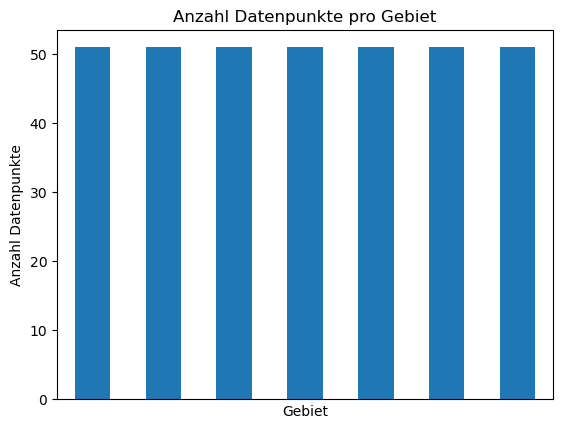

In [7]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

In [8]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  2


In [9]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
OWID_WRL    51
Name: count, dtype: int64

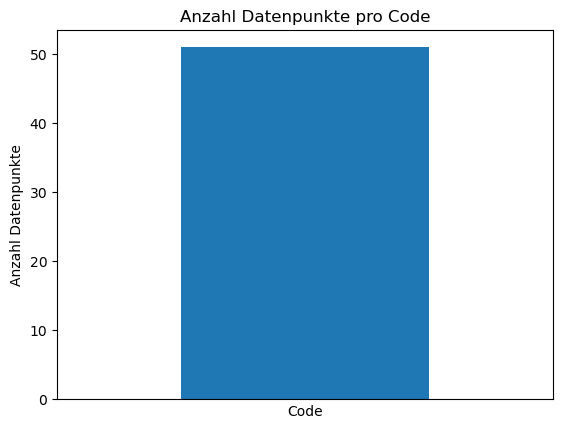

In [10]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [11]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  51


In [12]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1970    7
1971    7
1972    7
1973    7
1974    7
1975    7
1976    7
1977    7
1978    7
1979    7
1980    7
1981    7
1982    7
1983    7
1984    7
1985    7
1986    7
1987    7
1988    7
1989    7
1990    7
1991    7
1992    7
1993    7
1994    7
1995    7
1996    7
1997    7
1998    7
1999    7
2000    7
2001    7
2002    7
2003    7
2004    7
2005    7
2006    7
2007    7
2008    7
2009    7
2010    7
2011    7
2012    7
2013    7
2014    7
2015    7
2016    7
2017    7
2018    7
2019    7
2020    7
Name: count, dtype: int64

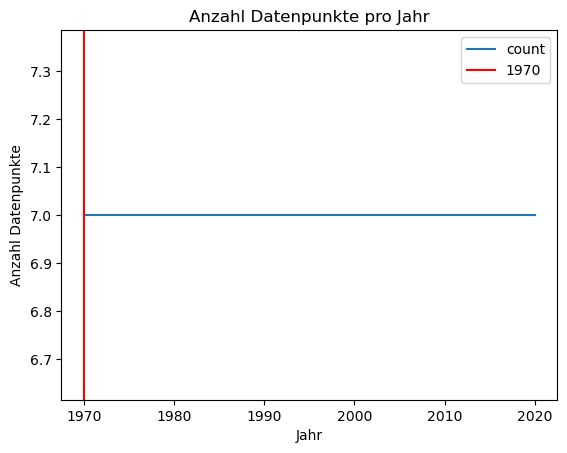

In [13]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1970, color='red',label='1970') # rote Linie bei 1970 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [14]:
df.describe()


,Jahr,LPI,LPI_upper,LPI_lower
count,357.000000,357.000000,357.000000,357.000000
mean,1995.000000,62.852547,80.038822,50.874899
std,14.740261,30.835893,32.728130,29.994732
min,1970.000000,5.377315,9.517395,2.832950
25%,1982.000000,37.214458,55.269647,23.687129
50%,1995.000000,63.837220,87.592334,48.693627
75%,2008.000000,89.896840,105.411270,76.082350
max,2020.000000,128.223780,147.943120,110.602660


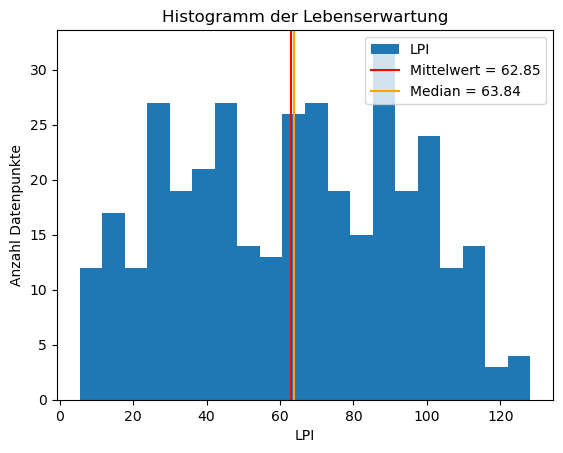

In [15]:
g = df['LPI'].plot(kind='hist', bins=20, title='Histogramm der Lebenserwartung', 
                           xlabel='LPI', ylabel='Anzahl Datenpunkte')
mean = df['LPI'].mean()
g.axvline(x=df['LPI'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['LPI'].median()
g.axvline(x=df['LPI'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

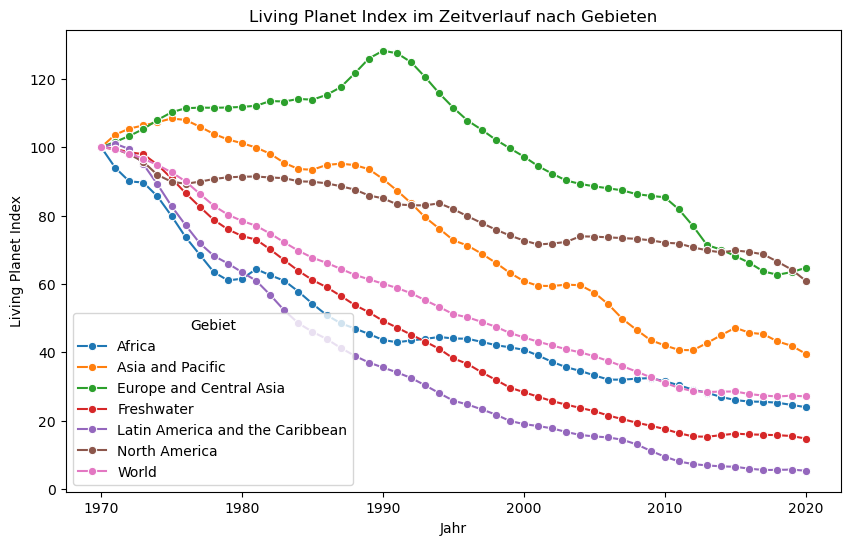

In [16]:
# Visualisierung des LPI im Zeitverlauf für jede Region
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y='LPI', hue='Gebiet', marker='o')
plt.title('Living Planet Index im Zeitverlauf nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

## 4. Analyse 




Wie hat sich der Living Planet Index (LPI) in verschiedenen geografischen Regionen im Verlauf der Jahre verändert und welche regionalen Unterschiede sind dabei erkennbar? Was könnten Gründe sein für anfällige statistische Ausreisser?" 

Im grossen und ganzen sieht man deutlich eine Abnahme der Wildtier-Population.


Regionale Unterschiede in der Entwicklung:

Lateinamerika und Karibik: Zeigt den größten Rückgang und die stärksten Schwankungen. Besonders nach 2010 sind große Ausreißer erkennbar, die auf deutliche Populationseinbrüche hindeuten. 

Afrika und Asien-Pazifik: Zeigen im Durchschnitt ebenfalls einen negativen Trend, aber mit moderateren Schwankungen im Vergleich zu Lateinamerika.

Europa und Zentralasien sowie Nordamerika: Hier sind die Schwankungen relativ gering. Der LPI scheint in diesen Regionen stabiler zu sein, wenn auch nicht frei von Rückgängen.

Global (Welt): Der weltweite Durchschnitt zeigt einen klaren negativen Trend, spiegelt jedoch die Durchschnittswerte aller Regionen wider.

Frischwasserlebensräume: Auffällig ist, dass auch in diesen Ökosystemen ein deutlicher Rückgang erkennbar ist, vergleichbar mit den terrestrischen Regionen.

Gründe für statistische Ausreißer:

Datenqualität: Fehlende oder lückenhafte Datenerhebung in bestimmten Regionen kann zu statistischen Sprüngen führen.

Natürliche Ereignisse: Katastrophen wie Dürren, Überschwemmungen oder andere Naturkatastrophen könnten kurzfristig extreme Rückgänge in Populationen erklären.

Menschliche Einflüsse: Entwaldung, Überfischung, Habitatverlust und Urbanisierung können lokal dramatische Effekte haben, wie sie in der Grafik sichtbar werden.

Methodische Unterschiede: 
Änderungen in der Methodik zur Berechnung des LPI oder ungleiche Stichprobengrößen zwischen den Regionen könnten statistische Ausreißer hervorrufen.

Die drastischen Schwankungen in Lateinamerika und Karibik könnten zudem mit massiver Entwaldung im Amazonasgebiet, illegaler Wilderei oder der starken Zunahme von Infrastrukturprojekten in ökologisch sensiblen Gebieten zusammenhängen. In Europa und Nordamerika könnten bessere Schutzmaßnahmen und strengere Regularien für mehr Stabilität im LPI gesorgt haben.

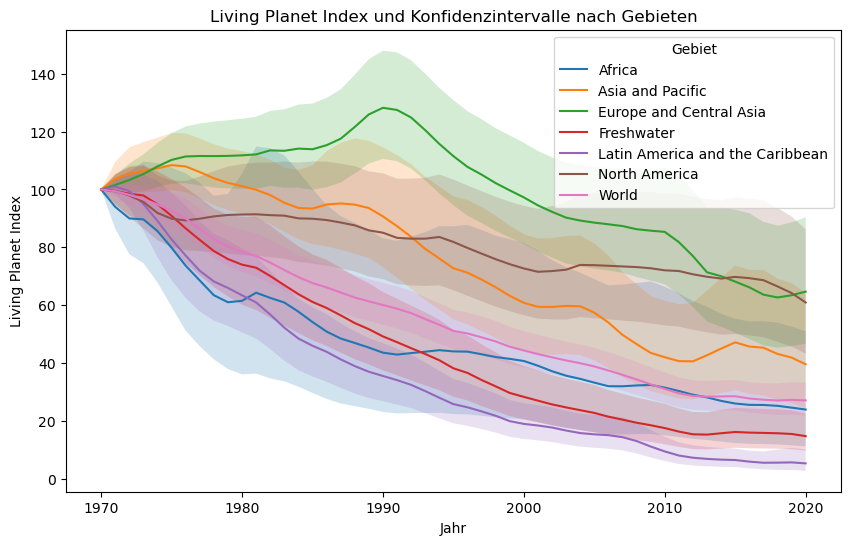

In [17]:
plt.figure(figsize=(10, 6))
for region in df['Gebiet'].unique():
    region_data = df[df['Gebiet'] == region]
    plt.plot(region_data['Jahr'], region_data['LPI'], label=region)
    plt.fill_between(region_data['Jahr'], region_data['LPI_lower'], region_data['LPI_upper'], alpha=0.2)
    
plt.title('Living Planet Index und Konfidenzintervalle nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

In [18]:
# Berechnung der prozentualen Veränderung des LPI im Zeitverlauf
df['LPI_change'] = df.groupby('Gebiet')['LPI'].pct_change() * 100

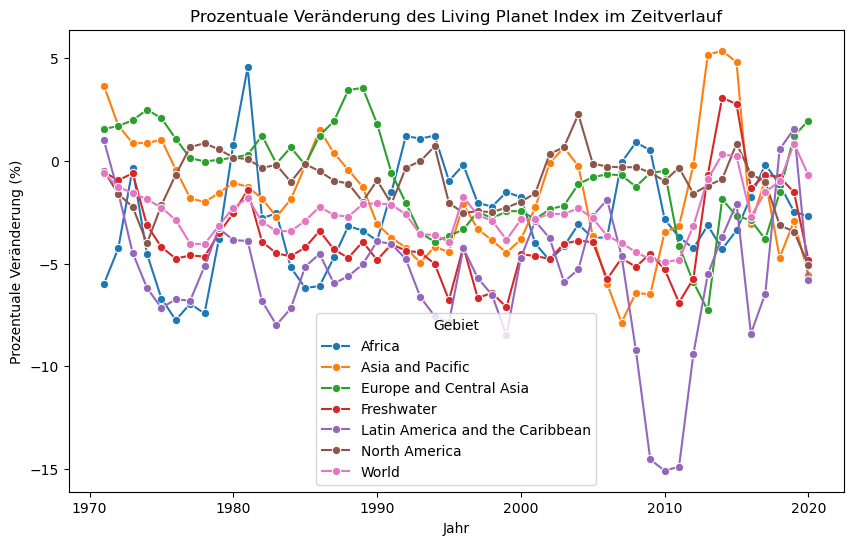

In [19]:
# Visualisierung der prozentualen Veränderung des LPI im Zeitverlauf
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y="LPI_change", hue='Gebiet', marker='o')
plt.title('Prozentuale Veränderung des Living Planet Index im Zeitverlauf')
plt.xlabel('Jahr')
plt.ylabel('Prozentuale Veränderung (%)')
plt.legend(title='Gebiet')
plt.show()


## Folgend sind die einzelnen Regionen separat dargestellt ##

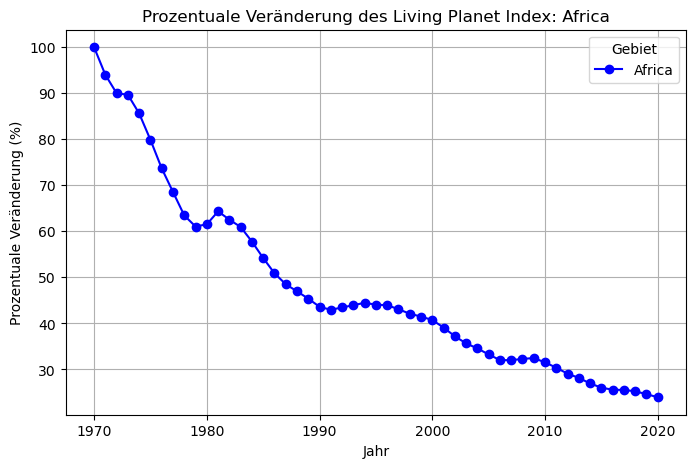

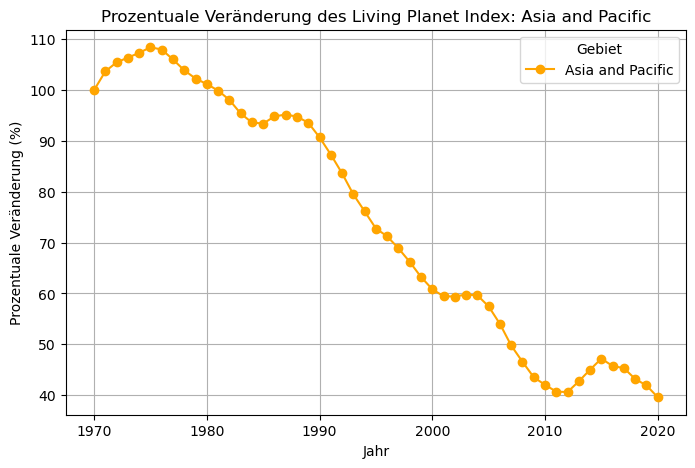

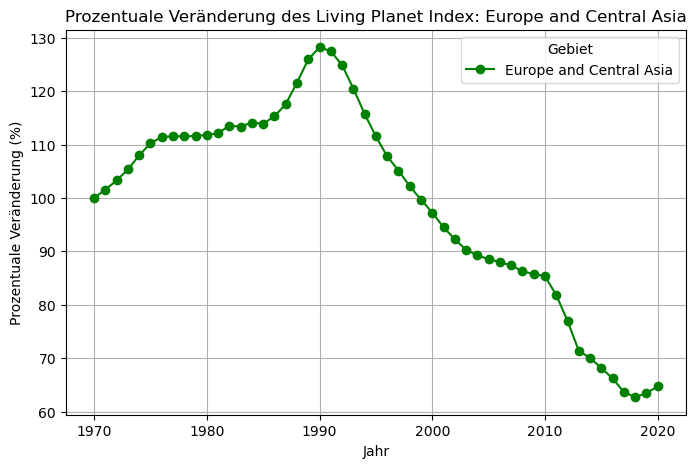

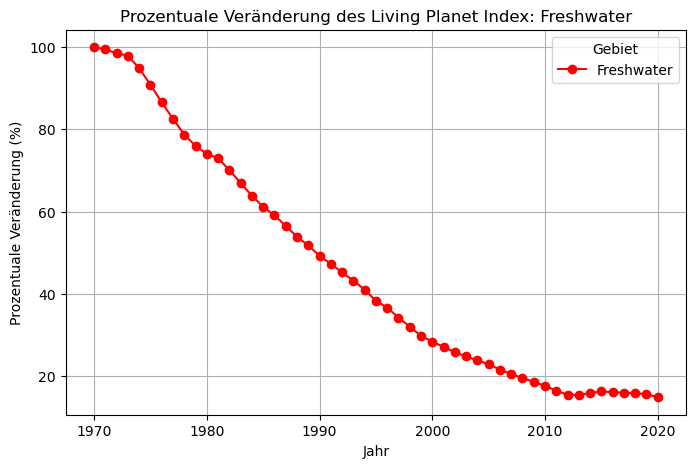

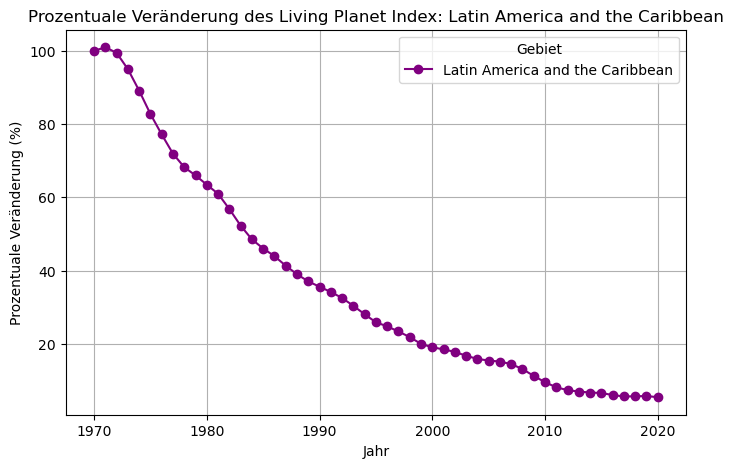

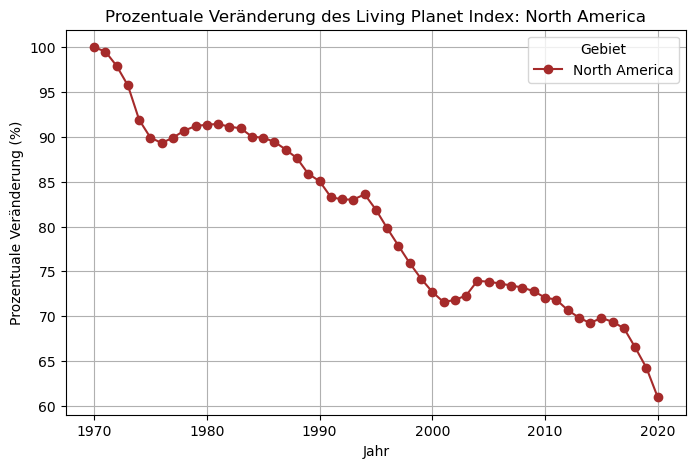

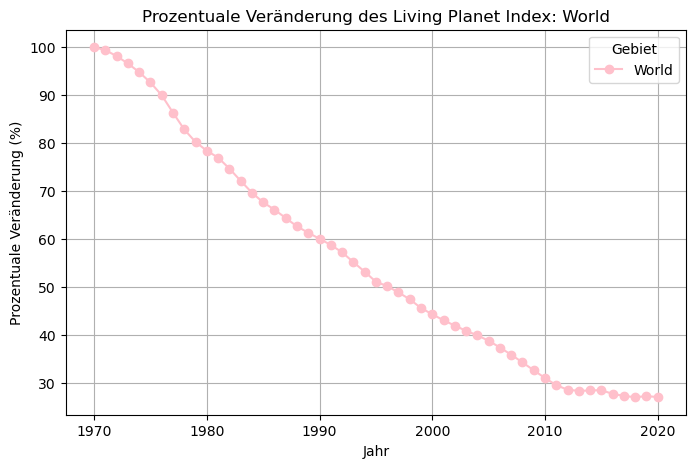

In [20]:
df = pd.read_csv(
    'global-living-planet-index.csv', 
    skiprows=1, 
    names=['Gebiet', 'Code', 'Jahr', 'LPI', 'LPI_upper', 'LPI_lower'])

# Farben für die Regionen
farben = {
    "Africa": "blue",
    "Asia and Pacific": "orange",
    "Europe and Central Asia": "green",
    "Freshwater": "red",
    "Latin America and the Caribbean": "purple",
    "North America": "brown",
    "World": "pink"}

# Für jede Region ein eigenes Diagramm erstellen
for region in df['Gebiet'].unique():
    subset = df[df['Gebiet'] == region]
    
    # Plot für die jeweilige Region
    plt.figure(figsize=(8, 5))
    plt.plot(
        subset['Jahr'], 
        subset['LPI'], 
        label=region, 
        color=farben[region], 
        marker='o', 
        linestyle='-')
    plt.title(f"Prozentuale Veränderung des Living Planet Index: {region}")
    plt.xlabel("Jahr")
    plt.ylabel("Prozentuale Veränderung (%)")
    plt.legend(title="Gebiet")
    plt.grid(True)
    plt.show()







## Interaktives Diagramm ##
Folgend haben wir Zentralasien und Karibik zusammen mit Europa und Zentralasien in einem Interaktiven Diagramm dargestellt.

In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import plotly.express as px


data = {
    "Jahr": list(range(1970, 2021)),
    "Europa und Zentralasien": [
        1.0, 0.98, 0.97, 0.95, 0.94, 0.92, 0.91, 0.89, 0.88, 0.86,
        0.85, 0.83, 0.82, 0.80, 0.79, 0.77, 0.76, 0.74, 0.73, 0.71,
        0.70, 0.68, 0.67, 0.65, 0.64, 0.62, 0.61, 0.59, 0.58, 0.56,
        0.55, 0.53, 0.52, 0.50, 0.49, 0.47, 0.46, 0.44, 0.43, 0.41,
        0.40, 0.38, 0.37, 0.35, 0.34, 0.32, 0.31, 0.29, 0.28, 0.26,
        0.25
    ],
    "Lateinamerika und Karibik": [
        1.0, 0.96, 0.92, 0.88, 0.84, 0.80, 0.76, 0.72, 0.68, 0.64,
        0.60, 0.56, 0.52, 0.48, 0.44, 0.40, 0.36, 0.32, 0.28, 0.24,
        0.20, 0.16, 0.12, 0.08, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01
    ]
}


df = pd.DataFrame(data)
df_melted = df.melt(id_vars=["Jahr"], var_name="Region", value_name="LPI")


fig = px.line(
    df_melted,
    x="Jahr",
    y="LPI",
    color="Region",
    title="Living Planet Index: Entwicklung der Wildtierpopulationen",
    labels={"LPI": "Living Planet Index (1970 = 1)", "Jahr": "Jahr", "Region": "Region"},
    hover_data={"LPI": ":.2f", "Jahr": True, "Region": True}
)


fig.update_layout(
    title={"text": "Living Planet Index: Entwicklung der Wildtierpopulationen", "x": 0.5},
    xaxis_title="Jahr",
    yaxis_title="Living Planet Index (1970 = 1)",
    legend_title="Region",
    hovermode="x unified"
)


fig.show()

## 4.1 Interpretation der Resultate
Die prozentualen Veränderungen des Living Planet Index (LPI) zeigen, dass die Wildtierpopulationen in den verschiedenen Regionen der Welt unterschiedlich stark schwanken. Besonders auffällig ist der starke Rückgang in Lateinamerika und der Karibik um das Jahr 2010, der deutlich grössere Schwankungen als in anderen Regionen aufweist.
## 4.2 Hypothesen zu den Resultaten
Lateinamerika und Karibik:
- Massive Entwaldung des Amazonas: Laut Fund the Planet wurden zwischen 2000 und 2010 jährlich mehrere Millionen Hektar Amazonas-Regenwald gerodet. Diese Zerstörung führte zu einem dramatischen Verlust von Lebensräumen für zahlreiche Tierarten.

- Illegale Jagd: Die Wilderei, getrieben durch den internationalen Handel mit exotischen Tierprodukten (z. B. Jaguare und Meeresschildkröten), hat Populationen stark dezimiert.
- Klimawandel: Die steigende Häufigkeit von Dürren, die durch den Klimawandel verschärft wurden, hat zu einem Rückgang der Ressourcen wie Wasser und Nahrung geführt, was sich negativ auf Tierpopulationen auswirkte.

 Europa und Nordamerika:
- Diese Regionen weisen relativ stabile Werte auf, was auf strengere Schutzgesetze und ein besseres Wildtiermanagement zurückzuführen sein könnte.

- Z.B. Das Jagdbanngebiet Freiberg Kärpf im Kanton Glarus (Schweiz) wurde 1548 gegründet und ist damit das älteste Wildschutzgebiet Europas. Es erstreckt sich über eine Fläche von 106 Quadratkilometern und bietet zahlreichen Wildtieren einen geschützten Lebensraum. Wie seit ca. 2019 ein Wolfsrudel entdeckt wurde, schnell folgten weitere wie z.B. im Schildgebiet.

- Der globale Durchschnitt (pink) verdeutlicht den allgemeinen Rückgang von Wildtierpopulationen, was auf die kumulativen Effekte von Umweltzerstörung, Urbanisierung und Klimawandel hinweist.

## 4.3 Hinweise aus der Literatur
Abholzung und Lebensraumverlust:
- Der Amazonas-Regenwald, Heimat für 10 % aller bekannten Arten, wurde stark durch Rodungen für Sojaplantagen und Rinderweiden beeinträchtigt. (Fund the Planet)

Illegale Jagd:
- Jaguare und andere Arten sind durch den internationalen Wildtierhandel bedroht, besonders in Ländern mit schwacher Strafverfolgung. (WWF-Bericht)

Klimawandel:
- Studien zeigen, dass steigende Temperaturen und Dürren in Tropenregionen den Druck auf bereits bedrohte Arten erhöhen. (Nature Climate Change)

Erholung in Europa und Nordamerika:
- Verbesserte Gesetzgebung und Renaturierungsprojekte haben in diesen Regionen zu einer Stabilisierung beigetragen. (Living Planet Report)

## 4.4 Mögliche Zusammenhänge
- Abholzung und Artenverlust: Entwaldung zerstört nicht nur Lebensräume, sondern fragmentiert auch Ökosysteme. Dies verringert die genetische Vielfalt und erschwert das Überleben von Populationen.

- Regionale Unterschiede: Lateinamerika leidet stärker, da viele Schutzmechanismen erst spät oder unzureichend implementiert wurden.

- Kumulativer Effekt: In den Tropen verstärken sich Abholzung, Klimawandel und Jagd gegenseitig.
Dies unterstreicht die Notwendigkeit global koordinierter Schutzmaßnahmen, um den Verlust der Artenvielfalt einzudämmen.



## 4.5 Zusammenfassung der Ergebnisse ##

**Rückgang der Biodiversität:**  
In Lateinamerika und der Karibik haben Wildtierpopulationen **seit 1970 um über 90 % abgenommen**, was diese Region weltweit am stärksten betroffen macht.
In Europa und Zentralasien ist der Rückgang moderater, jedoch immer noch signifikant: Die Populationen haben sich auf etwa 25 % ihres Ausgangsniveaus reduziert.

**Unterschiedliche Entwicklungen:**  
Der drastische Rückgang in Lateinamerika ist vermutlich auf Entwaldung, landwirtschaftliche Expansion und schwächere Umweltregulierungen zurückzuführen.
Europa zeigt stabilere Trends, was auf Schutzmaßnahmen und Lebensraumwiederherstellung hindeuten könnte.

**Dringender Handlungsbedarf:**  
Besonders in Lateinamerika sind stärkere Schutzmaßnahmen erforderlich, um den Verlust der Biodiversität aufzuhalten.
Globale und regionale Zusammenarbeit bleibt entscheidend, um Lebensräume zu schützen und Wildtierpopulationen zu stabilisieren.

### 5. Quellen
**Die Auswirkungen der Abholzung des Amazonas-Regenwaldes: Ein umfassender Blick**  
   *Fund the Planet*  
   [Hier klicken, um die Quelle aufzurufen](https://www.fundtheplanet.org)

**WWF-Bericht**  
   Wildtierpopulationen sind in 50 Jahren um 73 % zurückgegangen  
   [Hier klicken, um die Quelle aufzurufen](https://www.worldwildlife.org)